In [1]:
# General
from os import path
from random import randrange

from sklearn.model_selection import train_test_split, GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, make_scorer
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import pickle
import joblib 


## TRAIN SET

In [2]:
trainDataFull = pd.read_csv("trainData.csv")
trainDataFull.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4,9
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2,6
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0,3


In [3]:
trainDataFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 104 entries, v1 to target
dtypes: float64(103), int64(1)
memory usage: 49.1 MB


In [4]:
trainDataFull.describe()

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.077721,0.030062,0.194955,0.561411,0.157148,0.510892,0.339339,0.060755,0.133253,0.528776,...,0.052726,0.316979,0.042697,0.290546,0.617066,0.304186,0.430156,0.837012,0.279162,4.842335
std,0.515539,0.328176,0.737317,1.003366,0.479018,0.786976,0.632642,0.385161,0.639593,0.925803,...,0.151387,0.515414,0.208958,0.742261,0.928514,0.923758,0.804039,1.204724,0.692345,2.510794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.200000,0.400000,0.000000,5.000000
75%,0.000000,0.000000,0.200000,0.600000,0.200000,0.600000,0.400000,0.000000,0.000000,0.600000,...,0.000000,0.400000,0.000000,0.200000,0.800000,0.200000,0.400000,1.000000,0.200000,7.000000
max,19.400000,17.400000,17.000000,15.200000,13.400000,15.200000,6.600000,12.400000,21.000000,52.600000,...,4.400000,9.800000,9.600000,20.000000,16.600000,15.200000,17.400000,53.200000,18.200000,9.000000


In [5]:
trainData = trainDataFull.loc[:,'v1':'v99']
trainData.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.2,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0


In [6]:
trainLabels = trainDataFull.loc[:,'target']
trainLabels.unique()

array([9, 6, 3, 4, 2, 8, 7, 1, 5])

In [7]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(trainLabels)
label_encoded_y = label_encoder.transform(trainLabels)
label_encoded_y

array([8, 5, 2, ..., 7, 4, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(trainData.values, 
                                                    label_encoded_y, 
                                                    test_size = 0.3, 
                                                    random_state = 33,
                                                    shuffle = True,
                                                    stratify = label_encoded_y)

## MODEL-1 (XGBOOST)

In [45]:
xgb_model = xgb.XGBClassifier(n_estimators=10000,
                          learning_rate=0.01, #Default 0.05
                          reg_lambda=10,
                          max_depth=8,
                          gamma=0.25,
#                           subsample=1,
#                           colsample_bytree=1,
                          n_jobs=2,
                          seed=33)

print(xgb_model)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=0.25,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=8,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=2, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=10,
              scale_pos_weight=None, seed=33, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [47]:
xgb_model.fit(X_train, 
              y_train, 
              early_stopping_rounds=100,
              eval_metric='mlogloss',
              eval_set=[(X_train, y_train), (X_test, y_test)], 
              verbose=True)

[0]	validation_0-mlogloss:2.17266	validation_1-mlogloss:2.17319
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:2.14892	validation_1-mlogloss:2.14999
[2]	validation_0-mlogloss:2.12586	validation_1-mlogloss:2.12751
[3]	validation_0-mlogloss:2.10366	validation_1-mlogloss:2.10573
[4]	validation_0-mlogloss:2.08190	validation_1-mlogloss:2.08456
[5]	validation_0-mlogloss:2.06080	validation_1-mlogloss:2.06399
[6]	validation_0-mlogloss:2.04039	validation_1-mlogloss:2.04408
[7]	validation_0-mlogloss:2.02049	validation_1-mlogloss:2.02468
[8]	validation_0-mlogloss:2.00110	validation_1-mlogloss:2.00579
[9]	validation_0-mlogloss:1.98222	validation_1-mlogloss:1.98741
[10]	validation_0-mlogloss:1.96385	validation_1-mlogloss:1.96954
[11]	validation_0-mlogloss:1.94590	validation_1-mlogloss:1.95211
[12]	validation_0-mlogloss:1.92842	validation_1-mlogloss:1.935

[124]	validation_0-mlogloss:1.01467	validation_1-mlogloss:1.05673
[125]	validation_0-mlogloss:1.01070	validation_1-mlogloss:1.05299
[126]	validation_0-mlogloss:1.00670	validation_1-mlogloss:1.04924
[127]	validation_0-mlogloss:1.00276	validation_1-mlogloss:1.04553
[128]	validation_0-mlogloss:0.99886	validation_1-mlogloss:1.04188
[129]	validation_0-mlogloss:0.99501	validation_1-mlogloss:1.03824
[130]	validation_0-mlogloss:0.99117	validation_1-mlogloss:1.03463
[131]	validation_0-mlogloss:0.98736	validation_1-mlogloss:1.03107
[132]	validation_0-mlogloss:0.98361	validation_1-mlogloss:1.02754
[133]	validation_0-mlogloss:0.97989	validation_1-mlogloss:1.02403
[134]	validation_0-mlogloss:0.97621	validation_1-mlogloss:1.02061
[135]	validation_0-mlogloss:0.97254	validation_1-mlogloss:1.01716
[136]	validation_0-mlogloss:0.96890	validation_1-mlogloss:1.01377
[137]	validation_0-mlogloss:0.96531	validation_1-mlogloss:1.01039
[138]	validation_0-mlogloss:0.96177	validation_1-mlogloss:1.00707
[139]	vali

[249]	validation_0-mlogloss:0.70142	validation_1-mlogloss:0.76825
[250]	validation_0-mlogloss:0.69988	validation_1-mlogloss:0.76689
[251]	validation_0-mlogloss:0.69836	validation_1-mlogloss:0.76554
[252]	validation_0-mlogloss:0.69682	validation_1-mlogloss:0.76416
[253]	validation_0-mlogloss:0.69529	validation_1-mlogloss:0.76282
[254]	validation_0-mlogloss:0.69379	validation_1-mlogloss:0.76148
[255]	validation_0-mlogloss:0.69229	validation_1-mlogloss:0.76014
[256]	validation_0-mlogloss:0.69080	validation_1-mlogloss:0.75882
[257]	validation_0-mlogloss:0.68932	validation_1-mlogloss:0.75749
[258]	validation_0-mlogloss:0.68788	validation_1-mlogloss:0.75619
[259]	validation_0-mlogloss:0.68641	validation_1-mlogloss:0.75489
[260]	validation_0-mlogloss:0.68496	validation_1-mlogloss:0.75358
[261]	validation_0-mlogloss:0.68354	validation_1-mlogloss:0.75231
[262]	validation_0-mlogloss:0.68213	validation_1-mlogloss:0.75104
[263]	validation_0-mlogloss:0.68070	validation_1-mlogloss:0.74977
[264]	vali

[374]	validation_0-mlogloss:0.56700	validation_1-mlogloss:0.65191
[375]	validation_0-mlogloss:0.56628	validation_1-mlogloss:0.65129
[376]	validation_0-mlogloss:0.56549	validation_1-mlogloss:0.65066
[377]	validation_0-mlogloss:0.56479	validation_1-mlogloss:0.65007
[378]	validation_0-mlogloss:0.56407	validation_1-mlogloss:0.64947
[379]	validation_0-mlogloss:0.56332	validation_1-mlogloss:0.64885
[380]	validation_0-mlogloss:0.56260	validation_1-mlogloss:0.64824
[381]	validation_0-mlogloss:0.56191	validation_1-mlogloss:0.64767
[382]	validation_0-mlogloss:0.56117	validation_1-mlogloss:0.64704
[383]	validation_0-mlogloss:0.56046	validation_1-mlogloss:0.64645
[384]	validation_0-mlogloss:0.55972	validation_1-mlogloss:0.64584
[385]	validation_0-mlogloss:0.55904	validation_1-mlogloss:0.64527
[386]	validation_0-mlogloss:0.55832	validation_1-mlogloss:0.64468
[387]	validation_0-mlogloss:0.55764	validation_1-mlogloss:0.64413
[388]	validation_0-mlogloss:0.55697	validation_1-mlogloss:0.64357
[389]	vali

[499]	validation_0-mlogloss:0.49679	validation_1-mlogloss:0.59492
[500]	validation_0-mlogloss:0.49637	validation_1-mlogloss:0.59459
[501]	validation_0-mlogloss:0.49593	validation_1-mlogloss:0.59428
[502]	validation_0-mlogloss:0.49552	validation_1-mlogloss:0.59396
[503]	validation_0-mlogloss:0.49514	validation_1-mlogloss:0.59365
[504]	validation_0-mlogloss:0.49477	validation_1-mlogloss:0.59336
[505]	validation_0-mlogloss:0.49439	validation_1-mlogloss:0.59306
[506]	validation_0-mlogloss:0.49401	validation_1-mlogloss:0.59278
[507]	validation_0-mlogloss:0.49355	validation_1-mlogloss:0.59244
[508]	validation_0-mlogloss:0.49314	validation_1-mlogloss:0.59213
[509]	validation_0-mlogloss:0.49273	validation_1-mlogloss:0.59181
[510]	validation_0-mlogloss:0.49231	validation_1-mlogloss:0.59149
[511]	validation_0-mlogloss:0.49192	validation_1-mlogloss:0.59119
[512]	validation_0-mlogloss:0.49155	validation_1-mlogloss:0.59090
[513]	validation_0-mlogloss:0.49115	validation_1-mlogloss:0.59061
[514]	vali

[624]	validation_0-mlogloss:0.45403	validation_1-mlogloss:0.56362
[625]	validation_0-mlogloss:0.45372	validation_1-mlogloss:0.56341
[626]	validation_0-mlogloss:0.45349	validation_1-mlogloss:0.56323
[627]	validation_0-mlogloss:0.45318	validation_1-mlogloss:0.56303
[628]	validation_0-mlogloss:0.45293	validation_1-mlogloss:0.56285
[629]	validation_0-mlogloss:0.45266	validation_1-mlogloss:0.56268
[630]	validation_0-mlogloss:0.45232	validation_1-mlogloss:0.56244
[631]	validation_0-mlogloss:0.45203	validation_1-mlogloss:0.56222
[632]	validation_0-mlogloss:0.45179	validation_1-mlogloss:0.56205
[633]	validation_0-mlogloss:0.45151	validation_1-mlogloss:0.56184
[634]	validation_0-mlogloss:0.45121	validation_1-mlogloss:0.56164
[635]	validation_0-mlogloss:0.45096	validation_1-mlogloss:0.56145
[636]	validation_0-mlogloss:0.45067	validation_1-mlogloss:0.56124
[637]	validation_0-mlogloss:0.45040	validation_1-mlogloss:0.56105
[638]	validation_0-mlogloss:0.45013	validation_1-mlogloss:0.56087
[639]	vali

[749]	validation_0-mlogloss:0.42373	validation_1-mlogloss:0.54301
[750]	validation_0-mlogloss:0.42349	validation_1-mlogloss:0.54286
[751]	validation_0-mlogloss:0.42329	validation_1-mlogloss:0.54273
[752]	validation_0-mlogloss:0.42313	validation_1-mlogloss:0.54261
[753]	validation_0-mlogloss:0.42290	validation_1-mlogloss:0.54247
[754]	validation_0-mlogloss:0.42272	validation_1-mlogloss:0.54235
[755]	validation_0-mlogloss:0.42246	validation_1-mlogloss:0.54220
[756]	validation_0-mlogloss:0.42228	validation_1-mlogloss:0.54209
[757]	validation_0-mlogloss:0.42210	validation_1-mlogloss:0.54196
[758]	validation_0-mlogloss:0.42189	validation_1-mlogloss:0.54183
[759]	validation_0-mlogloss:0.42168	validation_1-mlogloss:0.54170
[760]	validation_0-mlogloss:0.42150	validation_1-mlogloss:0.54157
[761]	validation_0-mlogloss:0.42133	validation_1-mlogloss:0.54144
[762]	validation_0-mlogloss:0.42111	validation_1-mlogloss:0.54131
[763]	validation_0-mlogloss:0.42088	validation_1-mlogloss:0.54116
[764]	vali

[874]	validation_0-mlogloss:0.40078	validation_1-mlogloss:0.52902
[875]	validation_0-mlogloss:0.40061	validation_1-mlogloss:0.52892
[876]	validation_0-mlogloss:0.40044	validation_1-mlogloss:0.52882
[877]	validation_0-mlogloss:0.40024	validation_1-mlogloss:0.52871
[878]	validation_0-mlogloss:0.40008	validation_1-mlogloss:0.52861
[879]	validation_0-mlogloss:0.39990	validation_1-mlogloss:0.52851
[880]	validation_0-mlogloss:0.39977	validation_1-mlogloss:0.52843
[881]	validation_0-mlogloss:0.39958	validation_1-mlogloss:0.52833
[882]	validation_0-mlogloss:0.39943	validation_1-mlogloss:0.52825
[883]	validation_0-mlogloss:0.39925	validation_1-mlogloss:0.52816
[884]	validation_0-mlogloss:0.39910	validation_1-mlogloss:0.52808
[885]	validation_0-mlogloss:0.39894	validation_1-mlogloss:0.52799
[886]	validation_0-mlogloss:0.39877	validation_1-mlogloss:0.52789
[887]	validation_0-mlogloss:0.39861	validation_1-mlogloss:0.52781
[888]	validation_0-mlogloss:0.39844	validation_1-mlogloss:0.52772
[889]	vali

[999]	validation_0-mlogloss:0.38142	validation_1-mlogloss:0.51851
[1000]	validation_0-mlogloss:0.38127	validation_1-mlogloss:0.51843
[1001]	validation_0-mlogloss:0.38113	validation_1-mlogloss:0.51836
[1002]	validation_0-mlogloss:0.38099	validation_1-mlogloss:0.51829
[1003]	validation_0-mlogloss:0.38085	validation_1-mlogloss:0.51821
[1004]	validation_0-mlogloss:0.38071	validation_1-mlogloss:0.51814
[1005]	validation_0-mlogloss:0.38058	validation_1-mlogloss:0.51806
[1006]	validation_0-mlogloss:0.38043	validation_1-mlogloss:0.51798
[1007]	validation_0-mlogloss:0.38026	validation_1-mlogloss:0.51791
[1008]	validation_0-mlogloss:0.38011	validation_1-mlogloss:0.51783
[1009]	validation_0-mlogloss:0.37999	validation_1-mlogloss:0.51777
[1010]	validation_0-mlogloss:0.37985	validation_1-mlogloss:0.51770
[1011]	validation_0-mlogloss:0.37974	validation_1-mlogloss:0.51763
[1012]	validation_0-mlogloss:0.37962	validation_1-mlogloss:0.51757
[1013]	validation_0-mlogloss:0.37949	validation_1-mlogloss:0.51

[1122]	validation_0-mlogloss:0.36610	validation_1-mlogloss:0.51068
[1123]	validation_0-mlogloss:0.36595	validation_1-mlogloss:0.51062
[1124]	validation_0-mlogloss:0.36586	validation_1-mlogloss:0.51058
[1125]	validation_0-mlogloss:0.36568	validation_1-mlogloss:0.51050
[1126]	validation_0-mlogloss:0.36556	validation_1-mlogloss:0.51043
[1127]	validation_0-mlogloss:0.36547	validation_1-mlogloss:0.51039
[1128]	validation_0-mlogloss:0.36536	validation_1-mlogloss:0.51033
[1129]	validation_0-mlogloss:0.36524	validation_1-mlogloss:0.51027
[1130]	validation_0-mlogloss:0.36511	validation_1-mlogloss:0.51021
[1131]	validation_0-mlogloss:0.36501	validation_1-mlogloss:0.51016
[1132]	validation_0-mlogloss:0.36491	validation_1-mlogloss:0.51011
[1133]	validation_0-mlogloss:0.36480	validation_1-mlogloss:0.51005
[1134]	validation_0-mlogloss:0.36467	validation_1-mlogloss:0.50998
[1135]	validation_0-mlogloss:0.36458	validation_1-mlogloss:0.50994
[1136]	validation_0-mlogloss:0.36449	validation_1-mlogloss:0.5

[1245]	validation_0-mlogloss:0.35254	validation_1-mlogloss:0.50442
[1246]	validation_0-mlogloss:0.35244	validation_1-mlogloss:0.50437
[1247]	validation_0-mlogloss:0.35234	validation_1-mlogloss:0.50433
[1248]	validation_0-mlogloss:0.35226	validation_1-mlogloss:0.50429
[1249]	validation_0-mlogloss:0.35214	validation_1-mlogloss:0.50425
[1250]	validation_0-mlogloss:0.35204	validation_1-mlogloss:0.50421
[1251]	validation_0-mlogloss:0.35197	validation_1-mlogloss:0.50417
[1252]	validation_0-mlogloss:0.35188	validation_1-mlogloss:0.50414
[1253]	validation_0-mlogloss:0.35179	validation_1-mlogloss:0.50410
[1254]	validation_0-mlogloss:0.35170	validation_1-mlogloss:0.50406
[1255]	validation_0-mlogloss:0.35161	validation_1-mlogloss:0.50402
[1256]	validation_0-mlogloss:0.35152	validation_1-mlogloss:0.50398
[1257]	validation_0-mlogloss:0.35142	validation_1-mlogloss:0.50395
[1258]	validation_0-mlogloss:0.35131	validation_1-mlogloss:0.50391
[1259]	validation_0-mlogloss:0.35121	validation_1-mlogloss:0.5

[1368]	validation_0-mlogloss:0.34067	validation_1-mlogloss:0.49952
[1369]	validation_0-mlogloss:0.34056	validation_1-mlogloss:0.49947
[1370]	validation_0-mlogloss:0.34042	validation_1-mlogloss:0.49940
[1371]	validation_0-mlogloss:0.34033	validation_1-mlogloss:0.49937
[1372]	validation_0-mlogloss:0.34023	validation_1-mlogloss:0.49933
[1373]	validation_0-mlogloss:0.34014	validation_1-mlogloss:0.49929
[1374]	validation_0-mlogloss:0.34006	validation_1-mlogloss:0.49926
[1375]	validation_0-mlogloss:0.33998	validation_1-mlogloss:0.49924
[1376]	validation_0-mlogloss:0.33988	validation_1-mlogloss:0.49920
[1377]	validation_0-mlogloss:0.33980	validation_1-mlogloss:0.49917
[1378]	validation_0-mlogloss:0.33973	validation_1-mlogloss:0.49914
[1379]	validation_0-mlogloss:0.33964	validation_1-mlogloss:0.49910
[1380]	validation_0-mlogloss:0.33954	validation_1-mlogloss:0.49907
[1381]	validation_0-mlogloss:0.33945	validation_1-mlogloss:0.49903
[1382]	validation_0-mlogloss:0.33933	validation_1-mlogloss:0.4

[1491]	validation_0-mlogloss:0.33005	validation_1-mlogloss:0.49542
[1492]	validation_0-mlogloss:0.32996	validation_1-mlogloss:0.49540
[1493]	validation_0-mlogloss:0.32989	validation_1-mlogloss:0.49538
[1494]	validation_0-mlogloss:0.32980	validation_1-mlogloss:0.49535
[1495]	validation_0-mlogloss:0.32972	validation_1-mlogloss:0.49532
[1496]	validation_0-mlogloss:0.32966	validation_1-mlogloss:0.49529
[1497]	validation_0-mlogloss:0.32958	validation_1-mlogloss:0.49526
[1498]	validation_0-mlogloss:0.32946	validation_1-mlogloss:0.49521
[1499]	validation_0-mlogloss:0.32939	validation_1-mlogloss:0.49519
[1500]	validation_0-mlogloss:0.32932	validation_1-mlogloss:0.49516
[1501]	validation_0-mlogloss:0.32924	validation_1-mlogloss:0.49514
[1502]	validation_0-mlogloss:0.32916	validation_1-mlogloss:0.49512
[1503]	validation_0-mlogloss:0.32908	validation_1-mlogloss:0.49508
[1504]	validation_0-mlogloss:0.32900	validation_1-mlogloss:0.49505
[1505]	validation_0-mlogloss:0.32891	validation_1-mlogloss:0.4

[1614]	validation_0-mlogloss:0.31998	validation_1-mlogloss:0.49179
[1615]	validation_0-mlogloss:0.31991	validation_1-mlogloss:0.49177
[1616]	validation_0-mlogloss:0.31983	validation_1-mlogloss:0.49173
[1617]	validation_0-mlogloss:0.31976	validation_1-mlogloss:0.49171
[1618]	validation_0-mlogloss:0.31969	validation_1-mlogloss:0.49168
[1619]	validation_0-mlogloss:0.31962	validation_1-mlogloss:0.49167
[1620]	validation_0-mlogloss:0.31956	validation_1-mlogloss:0.49163
[1621]	validation_0-mlogloss:0.31950	validation_1-mlogloss:0.49161
[1622]	validation_0-mlogloss:0.31941	validation_1-mlogloss:0.49158
[1623]	validation_0-mlogloss:0.31936	validation_1-mlogloss:0.49156
[1624]	validation_0-mlogloss:0.31931	validation_1-mlogloss:0.49154
[1625]	validation_0-mlogloss:0.31923	validation_1-mlogloss:0.49150
[1626]	validation_0-mlogloss:0.31915	validation_1-mlogloss:0.49146
[1627]	validation_0-mlogloss:0.31906	validation_1-mlogloss:0.49144
[1628]	validation_0-mlogloss:0.31899	validation_1-mlogloss:0.4

[1737]	validation_0-mlogloss:0.31142	validation_1-mlogloss:0.48886
[1738]	validation_0-mlogloss:0.31133	validation_1-mlogloss:0.48884
[1739]	validation_0-mlogloss:0.31124	validation_1-mlogloss:0.48881
[1740]	validation_0-mlogloss:0.31117	validation_1-mlogloss:0.48879
[1741]	validation_0-mlogloss:0.31112	validation_1-mlogloss:0.48876
[1742]	validation_0-mlogloss:0.31106	validation_1-mlogloss:0.48875
[1743]	validation_0-mlogloss:0.31099	validation_1-mlogloss:0.48872
[1744]	validation_0-mlogloss:0.31094	validation_1-mlogloss:0.48871
[1745]	validation_0-mlogloss:0.31086	validation_1-mlogloss:0.48868
[1746]	validation_0-mlogloss:0.31080	validation_1-mlogloss:0.48866
[1747]	validation_0-mlogloss:0.31073	validation_1-mlogloss:0.48864
[1748]	validation_0-mlogloss:0.31064	validation_1-mlogloss:0.48862
[1749]	validation_0-mlogloss:0.31059	validation_1-mlogloss:0.48860
[1750]	validation_0-mlogloss:0.31052	validation_1-mlogloss:0.48857
[1751]	validation_0-mlogloss:0.31045	validation_1-mlogloss:0.4

[1860]	validation_0-mlogloss:0.30326	validation_1-mlogloss:0.48636
[1861]	validation_0-mlogloss:0.30320	validation_1-mlogloss:0.48635
[1862]	validation_0-mlogloss:0.30314	validation_1-mlogloss:0.48633
[1863]	validation_0-mlogloss:0.30310	validation_1-mlogloss:0.48632
[1864]	validation_0-mlogloss:0.30305	validation_1-mlogloss:0.48631
[1865]	validation_0-mlogloss:0.30299	validation_1-mlogloss:0.48629
[1866]	validation_0-mlogloss:0.30292	validation_1-mlogloss:0.48627
[1867]	validation_0-mlogloss:0.30284	validation_1-mlogloss:0.48625
[1868]	validation_0-mlogloss:0.30279	validation_1-mlogloss:0.48623
[1869]	validation_0-mlogloss:0.30272	validation_1-mlogloss:0.48621
[1870]	validation_0-mlogloss:0.30264	validation_1-mlogloss:0.48619
[1871]	validation_0-mlogloss:0.30256	validation_1-mlogloss:0.48617
[1872]	validation_0-mlogloss:0.30252	validation_1-mlogloss:0.48615
[1873]	validation_0-mlogloss:0.30246	validation_1-mlogloss:0.48614
[1874]	validation_0-mlogloss:0.30239	validation_1-mlogloss:0.4

[1983]	validation_0-mlogloss:0.29603	validation_1-mlogloss:0.48430
[1984]	validation_0-mlogloss:0.29597	validation_1-mlogloss:0.48428
[1985]	validation_0-mlogloss:0.29591	validation_1-mlogloss:0.48427
[1986]	validation_0-mlogloss:0.29586	validation_1-mlogloss:0.48425
[1987]	validation_0-mlogloss:0.29581	validation_1-mlogloss:0.48423
[1988]	validation_0-mlogloss:0.29574	validation_1-mlogloss:0.48422
[1989]	validation_0-mlogloss:0.29568	validation_1-mlogloss:0.48420
[1990]	validation_0-mlogloss:0.29563	validation_1-mlogloss:0.48419
[1991]	validation_0-mlogloss:0.29558	validation_1-mlogloss:0.48418
[1992]	validation_0-mlogloss:0.29553	validation_1-mlogloss:0.48417
[1993]	validation_0-mlogloss:0.29546	validation_1-mlogloss:0.48416
[1994]	validation_0-mlogloss:0.29540	validation_1-mlogloss:0.48413
[1995]	validation_0-mlogloss:0.29536	validation_1-mlogloss:0.48411
[1996]	validation_0-mlogloss:0.29530	validation_1-mlogloss:0.48409
[1997]	validation_0-mlogloss:0.29522	validation_1-mlogloss:0.4

[2106]	validation_0-mlogloss:0.28843	validation_1-mlogloss:0.48223
[2107]	validation_0-mlogloss:0.28837	validation_1-mlogloss:0.48222
[2108]	validation_0-mlogloss:0.28830	validation_1-mlogloss:0.48220
[2109]	validation_0-mlogloss:0.28824	validation_1-mlogloss:0.48218
[2110]	validation_0-mlogloss:0.28817	validation_1-mlogloss:0.48216
[2111]	validation_0-mlogloss:0.28810	validation_1-mlogloss:0.48213
[2112]	validation_0-mlogloss:0.28804	validation_1-mlogloss:0.48212
[2113]	validation_0-mlogloss:0.28799	validation_1-mlogloss:0.48211
[2114]	validation_0-mlogloss:0.28794	validation_1-mlogloss:0.48209
[2115]	validation_0-mlogloss:0.28787	validation_1-mlogloss:0.48208
[2116]	validation_0-mlogloss:0.28782	validation_1-mlogloss:0.48207
[2117]	validation_0-mlogloss:0.28776	validation_1-mlogloss:0.48205
[2118]	validation_0-mlogloss:0.28770	validation_1-mlogloss:0.48203
[2119]	validation_0-mlogloss:0.28764	validation_1-mlogloss:0.48201
[2120]	validation_0-mlogloss:0.28759	validation_1-mlogloss:0.4

[2229]	validation_0-mlogloss:0.28176	validation_1-mlogloss:0.48044
[2230]	validation_0-mlogloss:0.28171	validation_1-mlogloss:0.48043
[2231]	validation_0-mlogloss:0.28166	validation_1-mlogloss:0.48041
[2232]	validation_0-mlogloss:0.28160	validation_1-mlogloss:0.48040
[2233]	validation_0-mlogloss:0.28153	validation_1-mlogloss:0.48038
[2234]	validation_0-mlogloss:0.28150	validation_1-mlogloss:0.48037
[2235]	validation_0-mlogloss:0.28143	validation_1-mlogloss:0.48035
[2236]	validation_0-mlogloss:0.28139	validation_1-mlogloss:0.48034
[2237]	validation_0-mlogloss:0.28134	validation_1-mlogloss:0.48033
[2238]	validation_0-mlogloss:0.28131	validation_1-mlogloss:0.48031
[2239]	validation_0-mlogloss:0.28125	validation_1-mlogloss:0.48030
[2240]	validation_0-mlogloss:0.28119	validation_1-mlogloss:0.48029
[2241]	validation_0-mlogloss:0.28114	validation_1-mlogloss:0.48029
[2242]	validation_0-mlogloss:0.28111	validation_1-mlogloss:0.48028
[2243]	validation_0-mlogloss:0.28107	validation_1-mlogloss:0.4

[2352]	validation_0-mlogloss:0.27487	validation_1-mlogloss:0.47866
[2353]	validation_0-mlogloss:0.27483	validation_1-mlogloss:0.47866
[2354]	validation_0-mlogloss:0.27477	validation_1-mlogloss:0.47865
[2355]	validation_0-mlogloss:0.27474	validation_1-mlogloss:0.47864
[2356]	validation_0-mlogloss:0.27470	validation_1-mlogloss:0.47862
[2357]	validation_0-mlogloss:0.27464	validation_1-mlogloss:0.47860
[2358]	validation_0-mlogloss:0.27459	validation_1-mlogloss:0.47860
[2359]	validation_0-mlogloss:0.27453	validation_1-mlogloss:0.47859
[2360]	validation_0-mlogloss:0.27449	validation_1-mlogloss:0.47857
[2361]	validation_0-mlogloss:0.27445	validation_1-mlogloss:0.47855
[2362]	validation_0-mlogloss:0.27440	validation_1-mlogloss:0.47853
[2363]	validation_0-mlogloss:0.27436	validation_1-mlogloss:0.47853
[2364]	validation_0-mlogloss:0.27433	validation_1-mlogloss:0.47852
[2365]	validation_0-mlogloss:0.27429	validation_1-mlogloss:0.47851
[2366]	validation_0-mlogloss:0.27425	validation_1-mlogloss:0.4

[2475]	validation_0-mlogloss:0.26907	validation_1-mlogloss:0.47717
[2476]	validation_0-mlogloss:0.26902	validation_1-mlogloss:0.47716
[2477]	validation_0-mlogloss:0.26895	validation_1-mlogloss:0.47714
[2478]	validation_0-mlogloss:0.26890	validation_1-mlogloss:0.47713
[2479]	validation_0-mlogloss:0.26886	validation_1-mlogloss:0.47712
[2480]	validation_0-mlogloss:0.26881	validation_1-mlogloss:0.47711
[2481]	validation_0-mlogloss:0.26876	validation_1-mlogloss:0.47710
[2482]	validation_0-mlogloss:0.26871	validation_1-mlogloss:0.47709
[2483]	validation_0-mlogloss:0.26867	validation_1-mlogloss:0.47709
[2484]	validation_0-mlogloss:0.26863	validation_1-mlogloss:0.47707
[2485]	validation_0-mlogloss:0.26859	validation_1-mlogloss:0.47706
[2486]	validation_0-mlogloss:0.26853	validation_1-mlogloss:0.47705
[2487]	validation_0-mlogloss:0.26847	validation_1-mlogloss:0.47704
[2488]	validation_0-mlogloss:0.26842	validation_1-mlogloss:0.47702
[2489]	validation_0-mlogloss:0.26838	validation_1-mlogloss:0.4

[2598]	validation_0-mlogloss:0.26347	validation_1-mlogloss:0.47600
[2599]	validation_0-mlogloss:0.26343	validation_1-mlogloss:0.47599
[2600]	validation_0-mlogloss:0.26335	validation_1-mlogloss:0.47598
[2601]	validation_0-mlogloss:0.26332	validation_1-mlogloss:0.47598
[2602]	validation_0-mlogloss:0.26325	validation_1-mlogloss:0.47597
[2603]	validation_0-mlogloss:0.26322	validation_1-mlogloss:0.47596
[2604]	validation_0-mlogloss:0.26317	validation_1-mlogloss:0.47596
[2605]	validation_0-mlogloss:0.26314	validation_1-mlogloss:0.47595
[2606]	validation_0-mlogloss:0.26312	validation_1-mlogloss:0.47595
[2607]	validation_0-mlogloss:0.26309	validation_1-mlogloss:0.47595
[2608]	validation_0-mlogloss:0.26305	validation_1-mlogloss:0.47594
[2609]	validation_0-mlogloss:0.26302	validation_1-mlogloss:0.47594
[2610]	validation_0-mlogloss:0.26297	validation_1-mlogloss:0.47593
[2611]	validation_0-mlogloss:0.26293	validation_1-mlogloss:0.47592
[2612]	validation_0-mlogloss:0.26287	validation_1-mlogloss:0.4

[2721]	validation_0-mlogloss:0.25814	validation_1-mlogloss:0.47496
[2722]	validation_0-mlogloss:0.25809	validation_1-mlogloss:0.47495
[2723]	validation_0-mlogloss:0.25803	validation_1-mlogloss:0.47495
[2724]	validation_0-mlogloss:0.25799	validation_1-mlogloss:0.47493
[2725]	validation_0-mlogloss:0.25794	validation_1-mlogloss:0.47492
[2726]	validation_0-mlogloss:0.25788	validation_1-mlogloss:0.47491
[2727]	validation_0-mlogloss:0.25783	validation_1-mlogloss:0.47490
[2728]	validation_0-mlogloss:0.25778	validation_1-mlogloss:0.47489
[2729]	validation_0-mlogloss:0.25772	validation_1-mlogloss:0.47488
[2730]	validation_0-mlogloss:0.25768	validation_1-mlogloss:0.47486
[2731]	validation_0-mlogloss:0.25764	validation_1-mlogloss:0.47486
[2732]	validation_0-mlogloss:0.25761	validation_1-mlogloss:0.47485
[2733]	validation_0-mlogloss:0.25756	validation_1-mlogloss:0.47484
[2734]	validation_0-mlogloss:0.25751	validation_1-mlogloss:0.47482
[2735]	validation_0-mlogloss:0.25746	validation_1-mlogloss:0.4

[2844]	validation_0-mlogloss:0.25297	validation_1-mlogloss:0.47391
[2845]	validation_0-mlogloss:0.25294	validation_1-mlogloss:0.47391
[2846]	validation_0-mlogloss:0.25290	validation_1-mlogloss:0.47391
[2847]	validation_0-mlogloss:0.25287	validation_1-mlogloss:0.47390
[2848]	validation_0-mlogloss:0.25283	validation_1-mlogloss:0.47389
[2849]	validation_0-mlogloss:0.25280	validation_1-mlogloss:0.47389
[2850]	validation_0-mlogloss:0.25277	validation_1-mlogloss:0.47389
[2851]	validation_0-mlogloss:0.25274	validation_1-mlogloss:0.47389
[2852]	validation_0-mlogloss:0.25271	validation_1-mlogloss:0.47388
[2853]	validation_0-mlogloss:0.25268	validation_1-mlogloss:0.47388
[2854]	validation_0-mlogloss:0.25265	validation_1-mlogloss:0.47387
[2855]	validation_0-mlogloss:0.25263	validation_1-mlogloss:0.47386
[2856]	validation_0-mlogloss:0.25259	validation_1-mlogloss:0.47385
[2857]	validation_0-mlogloss:0.25253	validation_1-mlogloss:0.47384
[2858]	validation_0-mlogloss:0.25249	validation_1-mlogloss:0.4

[2967]	validation_0-mlogloss:0.24835	validation_1-mlogloss:0.47301
[2968]	validation_0-mlogloss:0.24833	validation_1-mlogloss:0.47300
[2969]	validation_0-mlogloss:0.24830	validation_1-mlogloss:0.47300
[2970]	validation_0-mlogloss:0.24827	validation_1-mlogloss:0.47299
[2971]	validation_0-mlogloss:0.24823	validation_1-mlogloss:0.47299
[2972]	validation_0-mlogloss:0.24818	validation_1-mlogloss:0.47299
[2973]	validation_0-mlogloss:0.24815	validation_1-mlogloss:0.47298
[2974]	validation_0-mlogloss:0.24813	validation_1-mlogloss:0.47298
[2975]	validation_0-mlogloss:0.24809	validation_1-mlogloss:0.47297
[2976]	validation_0-mlogloss:0.24806	validation_1-mlogloss:0.47297
[2977]	validation_0-mlogloss:0.24804	validation_1-mlogloss:0.47296
[2978]	validation_0-mlogloss:0.24798	validation_1-mlogloss:0.47295
[2979]	validation_0-mlogloss:0.24795	validation_1-mlogloss:0.47295
[2980]	validation_0-mlogloss:0.24791	validation_1-mlogloss:0.47294
[2981]	validation_0-mlogloss:0.24787	validation_1-mlogloss:0.4

[3090]	validation_0-mlogloss:0.24381	validation_1-mlogloss:0.47229
[3091]	validation_0-mlogloss:0.24377	validation_1-mlogloss:0.47228
[3092]	validation_0-mlogloss:0.24372	validation_1-mlogloss:0.47226
[3093]	validation_0-mlogloss:0.24368	validation_1-mlogloss:0.47226
[3094]	validation_0-mlogloss:0.24363	validation_1-mlogloss:0.47225
[3095]	validation_0-mlogloss:0.24359	validation_1-mlogloss:0.47224
[3096]	validation_0-mlogloss:0.24355	validation_1-mlogloss:0.47224
[3097]	validation_0-mlogloss:0.24351	validation_1-mlogloss:0.47223
[3098]	validation_0-mlogloss:0.24347	validation_1-mlogloss:0.47221
[3099]	validation_0-mlogloss:0.24344	validation_1-mlogloss:0.47221
[3100]	validation_0-mlogloss:0.24340	validation_1-mlogloss:0.47220
[3101]	validation_0-mlogloss:0.24338	validation_1-mlogloss:0.47220
[3102]	validation_0-mlogloss:0.24334	validation_1-mlogloss:0.47219
[3103]	validation_0-mlogloss:0.24331	validation_1-mlogloss:0.47218
[3104]	validation_0-mlogloss:0.24327	validation_1-mlogloss:0.4

[3213]	validation_0-mlogloss:0.23947	validation_1-mlogloss:0.47159
[3214]	validation_0-mlogloss:0.23943	validation_1-mlogloss:0.47159
[3215]	validation_0-mlogloss:0.23940	validation_1-mlogloss:0.47158
[3216]	validation_0-mlogloss:0.23938	validation_1-mlogloss:0.47158
[3217]	validation_0-mlogloss:0.23932	validation_1-mlogloss:0.47157
[3218]	validation_0-mlogloss:0.23930	validation_1-mlogloss:0.47157
[3219]	validation_0-mlogloss:0.23928	validation_1-mlogloss:0.47157
[3220]	validation_0-mlogloss:0.23926	validation_1-mlogloss:0.47157
[3221]	validation_0-mlogloss:0.23922	validation_1-mlogloss:0.47156
[3222]	validation_0-mlogloss:0.23919	validation_1-mlogloss:0.47156
[3223]	validation_0-mlogloss:0.23917	validation_1-mlogloss:0.47155
[3224]	validation_0-mlogloss:0.23914	validation_1-mlogloss:0.47154
[3225]	validation_0-mlogloss:0.23911	validation_1-mlogloss:0.47154
[3226]	validation_0-mlogloss:0.23907	validation_1-mlogloss:0.47153
[3227]	validation_0-mlogloss:0.23902	validation_1-mlogloss:0.4

[3336]	validation_0-mlogloss:0.23534	validation_1-mlogloss:0.47107
[3337]	validation_0-mlogloss:0.23530	validation_1-mlogloss:0.47106
[3338]	validation_0-mlogloss:0.23529	validation_1-mlogloss:0.47106
[3339]	validation_0-mlogloss:0.23525	validation_1-mlogloss:0.47105
[3340]	validation_0-mlogloss:0.23522	validation_1-mlogloss:0.47104
[3341]	validation_0-mlogloss:0.23519	validation_1-mlogloss:0.47104
[3342]	validation_0-mlogloss:0.23516	validation_1-mlogloss:0.47103
[3343]	validation_0-mlogloss:0.23512	validation_1-mlogloss:0.47103
[3344]	validation_0-mlogloss:0.23509	validation_1-mlogloss:0.47103
[3345]	validation_0-mlogloss:0.23507	validation_1-mlogloss:0.47103
[3346]	validation_0-mlogloss:0.23505	validation_1-mlogloss:0.47102
[3347]	validation_0-mlogloss:0.23501	validation_1-mlogloss:0.47102
[3348]	validation_0-mlogloss:0.23497	validation_1-mlogloss:0.47102
[3349]	validation_0-mlogloss:0.23495	validation_1-mlogloss:0.47102
[3350]	validation_0-mlogloss:0.23492	validation_1-mlogloss:0.4

[3459]	validation_0-mlogloss:0.23148	validation_1-mlogloss:0.47061
[3460]	validation_0-mlogloss:0.23145	validation_1-mlogloss:0.47061
[3461]	validation_0-mlogloss:0.23142	validation_1-mlogloss:0.47061
[3462]	validation_0-mlogloss:0.23139	validation_1-mlogloss:0.47060
[3463]	validation_0-mlogloss:0.23136	validation_1-mlogloss:0.47059
[3464]	validation_0-mlogloss:0.23133	validation_1-mlogloss:0.47058
[3465]	validation_0-mlogloss:0.23130	validation_1-mlogloss:0.47059
[3466]	validation_0-mlogloss:0.23129	validation_1-mlogloss:0.47059
[3467]	validation_0-mlogloss:0.23126	validation_1-mlogloss:0.47058
[3468]	validation_0-mlogloss:0.23122	validation_1-mlogloss:0.47057
[3469]	validation_0-mlogloss:0.23119	validation_1-mlogloss:0.47057
[3470]	validation_0-mlogloss:0.23115	validation_1-mlogloss:0.47056
[3471]	validation_0-mlogloss:0.23111	validation_1-mlogloss:0.47054
[3472]	validation_0-mlogloss:0.23109	validation_1-mlogloss:0.47053
[3473]	validation_0-mlogloss:0.23107	validation_1-mlogloss:0.4

[3582]	validation_0-mlogloss:0.22749	validation_1-mlogloss:0.47002
[3583]	validation_0-mlogloss:0.22746	validation_1-mlogloss:0.47001
[3584]	validation_0-mlogloss:0.22743	validation_1-mlogloss:0.47000
[3585]	validation_0-mlogloss:0.22740	validation_1-mlogloss:0.46999
[3586]	validation_0-mlogloss:0.22737	validation_1-mlogloss:0.46999
[3587]	validation_0-mlogloss:0.22731	validation_1-mlogloss:0.46997
[3588]	validation_0-mlogloss:0.22727	validation_1-mlogloss:0.46997
[3589]	validation_0-mlogloss:0.22724	validation_1-mlogloss:0.46996
[3590]	validation_0-mlogloss:0.22719	validation_1-mlogloss:0.46995
[3591]	validation_0-mlogloss:0.22716	validation_1-mlogloss:0.46995
[3592]	validation_0-mlogloss:0.22714	validation_1-mlogloss:0.46994
[3593]	validation_0-mlogloss:0.22709	validation_1-mlogloss:0.46993
[3594]	validation_0-mlogloss:0.22706	validation_1-mlogloss:0.46992
[3595]	validation_0-mlogloss:0.22703	validation_1-mlogloss:0.46992
[3596]	validation_0-mlogloss:0.22700	validation_1-mlogloss:0.4

[3705]	validation_0-mlogloss:0.22356	validation_1-mlogloss:0.46941
[3706]	validation_0-mlogloss:0.22354	validation_1-mlogloss:0.46940
[3707]	validation_0-mlogloss:0.22351	validation_1-mlogloss:0.46940
[3708]	validation_0-mlogloss:0.22348	validation_1-mlogloss:0.46940
[3709]	validation_0-mlogloss:0.22346	validation_1-mlogloss:0.46940
[3710]	validation_0-mlogloss:0.22344	validation_1-mlogloss:0.46939
[3711]	validation_0-mlogloss:0.22340	validation_1-mlogloss:0.46938
[3712]	validation_0-mlogloss:0.22338	validation_1-mlogloss:0.46938
[3713]	validation_0-mlogloss:0.22336	validation_1-mlogloss:0.46938
[3714]	validation_0-mlogloss:0.22334	validation_1-mlogloss:0.46938
[3715]	validation_0-mlogloss:0.22330	validation_1-mlogloss:0.46938
[3716]	validation_0-mlogloss:0.22328	validation_1-mlogloss:0.46938
[3717]	validation_0-mlogloss:0.22325	validation_1-mlogloss:0.46937
[3718]	validation_0-mlogloss:0.22323	validation_1-mlogloss:0.46938
[3719]	validation_0-mlogloss:0.22321	validation_1-mlogloss:0.4

[3828]	validation_0-mlogloss:0.21976	validation_1-mlogloss:0.46898
[3829]	validation_0-mlogloss:0.21971	validation_1-mlogloss:0.46898
[3830]	validation_0-mlogloss:0.21967	validation_1-mlogloss:0.46898
[3831]	validation_0-mlogloss:0.21963	validation_1-mlogloss:0.46897
[3832]	validation_0-mlogloss:0.21959	validation_1-mlogloss:0.46897
[3833]	validation_0-mlogloss:0.21955	validation_1-mlogloss:0.46897
[3834]	validation_0-mlogloss:0.21952	validation_1-mlogloss:0.46897
[3835]	validation_0-mlogloss:0.21948	validation_1-mlogloss:0.46896
[3836]	validation_0-mlogloss:0.21944	validation_1-mlogloss:0.46896
[3837]	validation_0-mlogloss:0.21942	validation_1-mlogloss:0.46896
[3838]	validation_0-mlogloss:0.21939	validation_1-mlogloss:0.46895
[3839]	validation_0-mlogloss:0.21935	validation_1-mlogloss:0.46895
[3840]	validation_0-mlogloss:0.21932	validation_1-mlogloss:0.46895
[3841]	validation_0-mlogloss:0.21930	validation_1-mlogloss:0.46895
[3842]	validation_0-mlogloss:0.21924	validation_1-mlogloss:0.4

[3951]	validation_0-mlogloss:0.21597	validation_1-mlogloss:0.46861
[3952]	validation_0-mlogloss:0.21593	validation_1-mlogloss:0.46861
[3953]	validation_0-mlogloss:0.21590	validation_1-mlogloss:0.46861
[3954]	validation_0-mlogloss:0.21586	validation_1-mlogloss:0.46860
[3955]	validation_0-mlogloss:0.21583	validation_1-mlogloss:0.46859
[3956]	validation_0-mlogloss:0.21580	validation_1-mlogloss:0.46859
[3957]	validation_0-mlogloss:0.21579	validation_1-mlogloss:0.46858
[3958]	validation_0-mlogloss:0.21576	validation_1-mlogloss:0.46858
[3959]	validation_0-mlogloss:0.21574	validation_1-mlogloss:0.46858
[3960]	validation_0-mlogloss:0.21572	validation_1-mlogloss:0.46858
[3961]	validation_0-mlogloss:0.21569	validation_1-mlogloss:0.46858
[3962]	validation_0-mlogloss:0.21567	validation_1-mlogloss:0.46858
[3963]	validation_0-mlogloss:0.21563	validation_1-mlogloss:0.46858
[3964]	validation_0-mlogloss:0.21561	validation_1-mlogloss:0.46858
[3965]	validation_0-mlogloss:0.21557	validation_1-mlogloss:0.4

[4074]	validation_0-mlogloss:0.21185	validation_1-mlogloss:0.46814
[4075]	validation_0-mlogloss:0.21182	validation_1-mlogloss:0.46813
[4076]	validation_0-mlogloss:0.21177	validation_1-mlogloss:0.46813
[4077]	validation_0-mlogloss:0.21175	validation_1-mlogloss:0.46812
[4078]	validation_0-mlogloss:0.21170	validation_1-mlogloss:0.46812
[4079]	validation_0-mlogloss:0.21166	validation_1-mlogloss:0.46811
[4080]	validation_0-mlogloss:0.21162	validation_1-mlogloss:0.46811
[4081]	validation_0-mlogloss:0.21158	validation_1-mlogloss:0.46810
[4082]	validation_0-mlogloss:0.21154	validation_1-mlogloss:0.46810
[4083]	validation_0-mlogloss:0.21149	validation_1-mlogloss:0.46809
[4084]	validation_0-mlogloss:0.21144	validation_1-mlogloss:0.46809
[4085]	validation_0-mlogloss:0.21138	validation_1-mlogloss:0.46808
[4086]	validation_0-mlogloss:0.21135	validation_1-mlogloss:0.46808
[4087]	validation_0-mlogloss:0.21131	validation_1-mlogloss:0.46807
[4088]	validation_0-mlogloss:0.21127	validation_1-mlogloss:0.4

[4197]	validation_0-mlogloss:0.20782	validation_1-mlogloss:0.46791
[4198]	validation_0-mlogloss:0.20779	validation_1-mlogloss:0.46792
[4199]	validation_0-mlogloss:0.20775	validation_1-mlogloss:0.46792
[4200]	validation_0-mlogloss:0.20771	validation_1-mlogloss:0.46791
[4201]	validation_0-mlogloss:0.20768	validation_1-mlogloss:0.46790
[4202]	validation_0-mlogloss:0.20766	validation_1-mlogloss:0.46791
[4203]	validation_0-mlogloss:0.20763	validation_1-mlogloss:0.46791
[4204]	validation_0-mlogloss:0.20761	validation_1-mlogloss:0.46791
[4205]	validation_0-mlogloss:0.20758	validation_1-mlogloss:0.46791
[4206]	validation_0-mlogloss:0.20756	validation_1-mlogloss:0.46790
[4207]	validation_0-mlogloss:0.20753	validation_1-mlogloss:0.46790
[4208]	validation_0-mlogloss:0.20752	validation_1-mlogloss:0.46791
[4209]	validation_0-mlogloss:0.20750	validation_1-mlogloss:0.46791
[4210]	validation_0-mlogloss:0.20747	validation_1-mlogloss:0.46790
[4211]	validation_0-mlogloss:0.20746	validation_1-mlogloss:0.4

[4320]	validation_0-mlogloss:0.20490	validation_1-mlogloss:0.46786
[4321]	validation_0-mlogloss:0.20488	validation_1-mlogloss:0.46786
[4322]	validation_0-mlogloss:0.20486	validation_1-mlogloss:0.46786
[4323]	validation_0-mlogloss:0.20484	validation_1-mlogloss:0.46786
[4324]	validation_0-mlogloss:0.20482	validation_1-mlogloss:0.46787
[4325]	validation_0-mlogloss:0.20479	validation_1-mlogloss:0.46787
[4326]	validation_0-mlogloss:0.20477	validation_1-mlogloss:0.46787
[4327]	validation_0-mlogloss:0.20475	validation_1-mlogloss:0.46787
[4328]	validation_0-mlogloss:0.20473	validation_1-mlogloss:0.46787
[4329]	validation_0-mlogloss:0.20471	validation_1-mlogloss:0.46787
[4330]	validation_0-mlogloss:0.20469	validation_1-mlogloss:0.46788
[4331]	validation_0-mlogloss:0.20467	validation_1-mlogloss:0.46788
[4332]	validation_0-mlogloss:0.20465	validation_1-mlogloss:0.46788
[4333]	validation_0-mlogloss:0.20463	validation_1-mlogloss:0.46788
[4334]	validation_0-mlogloss:0.20460	validation_1-mlogloss:0.4

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=33, reg_alpha=0,
              reg_lambda=10, scale_pos_weight=None, seed=33, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
y_pred

array([1, 1, 8, ..., 5, 1, 1])

In [49]:
predictions = [round(value) for value in y_pred]

In [50]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Default 82.15

Accuracy: 82.07%


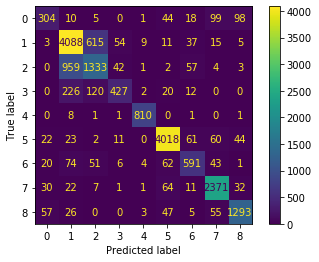

In [51]:
#fig = plt.figure(figsize=(10,10))
plot_confusion_matrix(xgb_model,
                     X_test,
                     y_test,
                     values_format='d')

## Save Valid Score

In [27]:
y_score = xgb_model.predict_proba(X_test)
y_score[0]

array([0.00379923, 0.26480106, 0.41778457, 0.00063509, 0.0028951 ,
       0.08093177, 0.14154965, 0.08500133, 0.00260218], dtype=float32)

In [28]:
valid_score = pd.DataFrame(y_score, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
valid_score

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,3.799228e-03,0.264801,0.417785,0.000635,0.002895,0.080932,0.141550,0.085001,0.002602
1,5.014228e-03,0.660614,0.307334,0.017620,0.000024,0.000082,0.008561,0.000053,0.000697
2,2.889307e-01,0.004194,0.001599,0.000097,0.000227,0.011067,0.001141,0.011937,0.680808
3,1.149890e-02,0.000693,0.000115,0.000400,0.000098,0.052630,0.006221,0.069438,0.858906
4,2.957860e-03,0.755073,0.115660,0.091823,0.001940,0.002584,0.022516,0.003064,0.004381
...,...,...,...,...,...,...,...,...,...
18559,1.764348e-03,0.478280,0.503354,0.000478,0.000972,0.000527,0.000651,0.000753,0.013221
18560,6.187039e-01,0.001409,0.022077,0.010871,0.003653,0.026948,0.075178,0.203221,0.037939
18561,8.204504e-06,0.000018,0.000049,0.000006,0.000002,0.999573,0.000104,0.000234,0.000006
18562,9.256264e-07,0.995080,0.002490,0.002373,0.000009,0.000002,0.000040,0.000002,0.000003


In [29]:
valid_score.to_csv('./results/valid-submission-xgboost.csv', index = False)

## Save & Load Model

In [21]:
xgb_model.save_model('./model/xgboost-1')

In [29]:
xgb_model = xgb.XGBClassifier()
xgb_model.load_model('./model/xgboost-1')
predictions = xgb_model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.15%


## joblib

#### xgboost model

In [30]:
# Save the model as a pickle in a file 
joblib.dump(xgb_model, './model/model_xgboost.pkl') 
  
# Load the model from the file 
xgboost_from_joblib = joblib.load('./model/model_xgboost.pkl')  
  
# Use the loaded model to make predictions 
xgboost_predictions = xgboost_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, xgboost_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.15%


## GridSearchCV 

In [ ]:
clf = GridSearchCV(xgb_model,
                   {'max_depth': [4, 6],
                    'n_estimators': [100, 200]}, 
                    verbose=1,
                    cv=2)
clf.fit(X_train, 
        y_train, 
        early_stopping_rounds=10,
        eval_metric='mlogloss',
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=True)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
# Save the model as a pickle in a file 
joblib.dump(clf.best_estimator_, './model/clf.pkl')

# Load the model from the file 
clf_from_joblib = joblib.load('./model/clf.pkl')  

# Use the loaded model to make predictions 
clf_predictions = clf_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, clf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# TEST

In [31]:
testData = pd.read_csv("testData.csv")
testData

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,0.0,0.0,0.0,0.0,0.2,0.2,0.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.6,5.0,0.0
1,0.0,0.0,0.0,5.2,0.0,0.0,0.0,0.0,1.6,0.8,...,0.0,0.0,0.8,0.0,0.0,3.6,0.4,0.0,2.4,0.0
2,0.0,0.0,0.8,2.2,0.0,0.4,0.0,0.0,0.2,0.0,...,0.0,0.0,0.4,0.0,0.2,1.6,0.6,0.0,0.6,1.6
3,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.6,0.2,0.0,0.0,0.4,0.0,0.0,0.0,0.8,...,0.0,0.0,0.6,0.0,0.0,0.2,0.2,0.6,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,0.0,0.0,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,1.2,0.0,0.4,0.0,0.6,0.0
144364,0.0,0.0,0.0,0.0,0.4,0.0,0.6,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,2.6,0.0
144365,0.0,0.0,0.0,0.4,0.2,1.4,1.4,0.0,0.2,0.2,...,0.0,0.6,0.2,0.0,0.2,1.2,0.0,1.4,0.6,0.2
144366,0.0,0.0,0.0,0.2,0.0,0.8,1.2,0.0,0.0,0.4,...,0.0,0.0,0.4,0.0,0.0,0.2,0.2,1.2,1.4,0.0


In [32]:
# Use the loaded model to make predictions 
test_predictions = xgb_model.predict(testData.values)
test_predictions

array([3, 7, 5, ..., 1, 3, 2])

In [33]:
# Use the loaded model to make predictions probability
test_predictions = xgb_model.predict_proba(testData.values)
test_predictions

array([[7.63000862e-05, 3.20604779e-02, 2.37925109e-02, ...,
        2.08821730e-03, 9.19445811e-05, 6.83501867e-06],
       [5.64665068e-03, 1.09313168e-02, 7.10249413e-03, ...,
        2.22740718e-03, 7.37133920e-01, 1.03550067e-03],
       [1.17295249e-05, 7.75201079e-06, 1.66415830e-05, ...,
        2.46327854e-05, 2.02789932e-04, 9.72413636e-06],
       ...,
       [7.11770481e-05, 5.75781345e-01, 3.76922131e-01, ...,
        1.82089629e-03, 7.60737603e-05, 3.33397475e-05],
       [6.11272189e-05, 2.16933310e-01, 1.79757904e-02, ...,
        4.97500238e-04, 1.77324800e-05, 1.03810635e-05],
       [2.19599446e-04, 4.14496541e-01, 5.48041880e-01, ...,
        2.05512475e-02, 9.33763149e-05, 8.64508547e-05]], dtype=float32)

In [34]:
result = pd.DataFrame(test_predictions, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
result

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.000076,0.032060,0.023793,0.941808,0.000028,0.000048,0.002088,0.000092,0.000007
1,0.005647,0.010931,0.007102,0.000951,0.000581,0.234390,0.002227,0.737134,0.001036
2,0.000012,0.000008,0.000017,0.000002,0.000001,0.999723,0.000025,0.000203,0.000010
3,0.000149,0.774059,0.212383,0.011470,0.000045,0.000037,0.000209,0.000153,0.001495
4,0.441902,0.000215,0.000284,0.000082,0.000349,0.004052,0.001649,0.102956,0.448512
...,...,...,...,...,...,...,...,...,...
144363,0.620487,0.001820,0.001758,0.008492,0.000247,0.301434,0.020636,0.018761,0.026366
144364,0.000372,0.186381,0.749727,0.028461,0.000330,0.000910,0.033620,0.000080,0.000118
144365,0.000071,0.575781,0.376922,0.045127,0.000071,0.000096,0.001821,0.000076,0.000033
144366,0.000061,0.216933,0.017976,0.764456,0.000039,0.000009,0.000498,0.000018,0.000010


In [35]:
result.to_csv('./results/submission-xgboost.csv', index = False)

## REFERENCES

1- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

2- https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

3- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

4- https://www.datacamp.com/community/tutorials/xgboost-in-python

5- https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier